In [2]:
# Importing packages
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
import matplotlib as mpl
import networkx as nx
from matplotlib.gridspec import GridSpec
from numpy.fft import fft, ifft

# For using latex formula
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['text.usetex'] = True
plt.rc('text.latex', preamble=r'\usepackage{amsmath,dsfont}')

In [4]:
# Function for finding start and end points of the activity cycles
# Input: Rho
# Output: startpoints &  endpoints

def StartAndEndPoints(Rho, precision):
    #precision=1-0.95*max(Rho)  #default = 0.05
    t=np.arange(0,len(Rho))
    tmax=max(t)
    threshold=min(Rho)
    flag=False
    i=0
    startlocs=[]
    endlocs=[]
    while i<(tmax-10):
        if ( Rho[i]-threshold <= precision ):
            i=i+1
            continue
        first=i
        if (Rho[i-1] < Rho[i]):

            first=first-1
            if i==0:
                first=0
        startlocs.append(first)
        flag=True
        while(flag and i<tmax-1):
            i=i+1
            if ( Rho[i]-threshold <= precision ):
                flag=False
        endlocs.append(i)
        i=i+1;
        
    return(startlocs,endlocs)

In [5]:
# Function for finding maximum points of the activity cycles
# Input: startlocs and endlocs
# Output: maxpoints 

def MaxPoints(Rho,startlocs,endlocs):
    maxpoints=[]
    if endlocs==[]:
        return(maxpoints)
    else:
        x=np.arange(len(startlocs))
        for i in x:
            interval=Rho[startlocs[i]:endlocs[i]]
            #m=max(interval)
            maxpoints.append(interval.argmax()+startlocs[i])
        return(maxpoints)

In [6]:
# Function for calculating burst width of a timeseri
# Input: Rho , tmax
# Output: An array including the width of the burst at each time --> y

def BurstWidth(Rho,precision):
    tmax=len(Rho)
    y=np.zeros(len(Rho))
    startlocs , endlocs = StartAndEndPoints(Rho,precision)
    startlocs.append(tmax)
    endlocs.append(tmax)
    if startlocs==[]:
        startlocs.append(0)
    if endlocs==[]:
        endlocs.append(0)
    imax=len(endlocs)-1
    i=0
    smean=9 # mean value of a silence interval
    a=startlocs[0]
    while (i<imax):
        if startlocs[i+1]-endlocs[i] < smean:

            i=i+1
            continue
        else:
            b=endlocs[i]
            c=b-a
            for j in np.arange(a,b):
                y[j] = c
            a=startlocs[i+1]
            i=i+1
    if (a<10):
        if all(v < 0.01 for v in Rho):
            y=np.zeros(len(Rho))
        else:    
            y=np.ones(len(y))
            y[0], y[len(y)-1] = 0, 0
    else:
        ymax=max(y)
        if ymax!=0:
            y=y/ymax
    return(np.array(y))

In [7]:
# Function for calculating Shanon entropy of burst width
# Input: y (The array of burst width)
# Output: hB; the shanon entropy of the bursts for the input --> a not normalized number

def BurstShanon(y):
    y_round=np.round(y, decimals=2)
    l=list(y_round)
    hB=0
    distsB=np.zeros(101)
    for i in np.arange(101):
        distsB[i] = (l.count(i/100))/len(l)
        if (distsB[i]!=0):
            hB = hB - distsB[i] * np.log2(distsB[i])
    return(hB)

In [8]:
# Function for calculating Shanon entropy of rho (the amplitude)
# Input: rho
# Output: hA; the shanon entropy of the amplitudes for the input --> a not normalized number

def AmplitudeShanon(rho):
    rho_round=np.round(rho, decimals=2)
    l=list(rho_round)
    hA=0
    distsA=np.zeros(101)
    for i in np.arange(101):
        distsA[i] = (l.count(i/100))/len(l)
        if (distsA[i]!=0):
            hA = hA - distsA[i] * np.log2(distsA[i])
    return(hA)

In [9]:
# Function for calculating Shanon entropy of maximum values of each activity
# Input: rho and precision
# Output: hM; the shanon entropy of the maximums for the input --> a not normalized number

def MaximumShanon(Rho,precision):
    startlocs , endlocs = StartAndEndPoints(Rho,precision)
    if endlocs==[]:
        return(0)
    else:
        maxlocs=MaxPoints(Rho,startlocs,endlocs)
        maxvals=[]
        for i in maxlocs:
            maxvals.append(Rho[i])
        maxvals_round=np.round(maxvals, decimals=2)
        l=list(maxvals_round)
        hM=0
        distsM=np.zeros(101)
        for i in np.arange(101):
            distsM[i] = (l.count(i/100))/len(l)
            if (distsM[i]!=0):
                hM = hM - distsM[i] * np.log2(distsM[i])
        return(hM)

Text(0, 0.5, 'number of neuron')

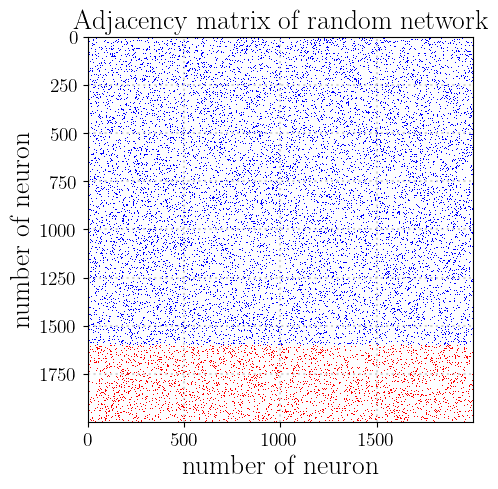

In [25]:
#####################################################################
# This code generates a random network with the specified number of #
# nodes and connection probabilities                                #
####################################################################

N = 2000  # Number of nodes
P = 0.1  # Probability of connections in random network
E = 0.8  # Percentage of excitatory neurons
n_E = int(N * E)  # Number of excitatory neurons

# Initialize arrays
A = np.zeros((N, N), dtype=int)  # Adjacency matrix

# Create adjacency matrix of random network (directed)
for i in range(N):
    for j in range(N):
        if i == j:
            continue
        if random.random() < P:
            # for excitatory synapses
            if i < n_E:
                A[i][j] = 1
            # for inhibitory synapses
            else:
                A[i][j] = -1

# Plotting adjacency matrix
fs = 20  #font size
ls = 14  #label size
Adj_cm = 'bwr_r'  # colormap for adjacency matrix 
plt.figure(figsize = (5, 5))
plt.grid(color = 'C7', alpha=.3, linestyle = ':', linewidth = 1.5)
plt.imshow(A, interpolation='nearest', cmap=Adj_cm)
plt.tick_params(axis='both', labelsize=ls)
plt.title('Adjacency matrix of random network', fontsize=fs)
plt.xlabel('number of neuron', fontsize=fs)
plt.ylabel('number of neuron', fontsize=fs)

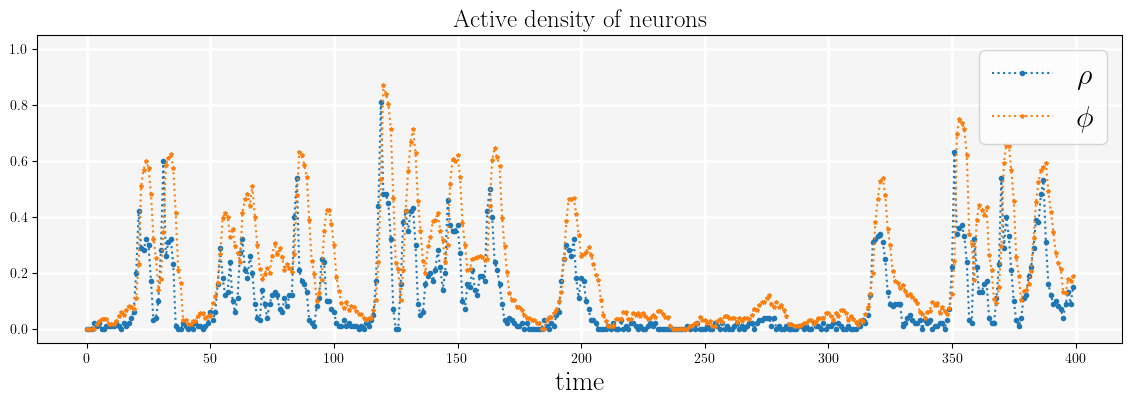

In [17]:
####################################################################################################
# This code is for simulating a neural network with excitatory and inhibitory neurons. 
# The code models an Erdős-Rényi (ER) network (NOT-MODULAR) with node dynamics, link activation counters, 
# and external input. 
#####################################################################################################
import numpy as np
import random
import time

fs = 20 # font size

# Setting parameters and constants
N = 100  # Number of nodes
P = 0.2  # Probability of connections in random network
E = 0.8  # Percentage of excitatory neurons
TE = 5  # Activation time of excitatory links
ETA = 0.008  # Noise probability
TI = 7  # Activation time of inhibitory links
D = 4  # Threshold value for firing
TMAX = 400  # Maximum time
ICURRENT = 4  # Absolute current of an active inhibitory synapse
ECURRENT = 1  # Current of an active excitatory synapse

# Initialize arrays
A = np.zeros((N, N), dtype=int)  # Adjacency matrix
node_state = np.zeros(N, dtype=int)  # State of neurons (0=inactive, 1=active)
node_input = np.zeros(N, dtype=float)  # Neuron input
link_counter = np.zeros((N, N), dtype=int)  # Link activation counters
link_counter_updated = np.zeros((N, N), dtype=int)  # Updated link counters
active_node_density = np.zeros(TMAX, dtype=float)  # Density of active neurons
active_link_density = np.zeros(TMAX, dtype=float)  # Density of active neurons

# Inline function equivalent
def link_state(x):
    return 0 if x == 0 else 1

# Main function
def main():
    # Set random seed
    random.seed(time.time())
    n_E = int(N * E)  # Number of excitatory neurons
    L_total = 0  # Total number of links
    t = 0

    # Create adjacency matrix of random network (directed)
    for i in range(N):
        for j in range(N):
            if i == j:
                continue
            if random.random() < P:
                # for excitatory synapses
                if i < n_E:
                    A[i][j] = 1
                    L_total = L_total+1
                # for inhibitory synapses
                else:
                    A[i][j] = -1
                    L_total = L_total+1

    # Initial conditions
    act_E_density = 0.0  # Fraction of active excitatory neurons
    act_I_density = 0.0  # Fraction of active inhibitory neurons
    act_E_link_density = 0.0  # Fraction of active excitatory synapses
    act_I_link_density = 0.0  # Fraction of active inhibitory synapses

    # Initial external input on nodes at t=0
    N_E_0 = int(n_E * ETA)  # Initial active excitatory neurons
    N_I_0 = int((N - n_E) * ETA)  # Initial active inhibitory neurons

    # Activate excitatory neurons
    for i in range(N_E_0):
        node_state[i] = 1
        act_E_density += 1

    # Activate inhibitory neurons
    for i in range(N_I_0):
        node_state[N - i - 1] = 1
        act_I_density += 1

    # Output at t=0
    act_E_density /= N
    act_I_density /= N
    active_node_density[t] = act_E_density + act_I_density
    active_link_density[t] = 0
    
    # Start dynamics
    t += 1
    while t < TMAX:
        # Update link counters for excitatory links
        for i in range(n_E):
            for j in range(N):
                if A[i][j] != 0:
                    if node_state[i] == 0 and link_counter[i][j] == 0:
                        link_counter_updated[i][j] = 0
                    elif node_state[i] == 1 and link_counter[i][j] == 0:
                        link_counter_updated[i][j] = 1
                        active_link_density[t] = active_link_density[t] + 1
                    elif 1 <= link_counter[i][j] < TE:
                        link_counter_updated[i][j] = link_counter[i][j] + 1
                        active_link_density[t] = active_link_density[t] + 1
                    elif link_counter[i][j] == TE:
                        link_counter_updated[i][j] = 0

        # Update link counters for inhibitory links
        for i in range(n_E, N):
            for j in range(N):
                if A[i][j] != 0:
                    if node_state[i] == 0 and link_counter[i][j] == 0:
                        link_counter_updated[i][j] = 0
                    elif node_state[i] == 1 and link_counter[i][j] == 0:
                        link_counter_updated[i][j] = 1
                        active_link_density[t] = active_link_density[t] + 1
                    elif 1 <= link_counter[i][j] < TI:
                        link_counter_updated[i][j] = link_counter[i][j] + 1
                        active_link_density[t] = active_link_density[t] + 1
                    elif link_counter[i][j] == TI:
                        link_counter_updated[i][j] = 0

        # Update node states
        # Compute node inputs
        for i in range(N):
            positive_input = sum(A[j][i] * link_state(link_counter_updated[j][i]) for j in range(n_E))
            negative_input = sum(A[j][i] * link_state(link_counter_updated[j][i]) for j in range(n_E, N))
            node_input[i] = ECURRENT * positive_input + ICURRENT * negative_input

        # Update node states based on threshold
        for i in range(N):
            node_state[i] = 1 if node_input[i] >= D else 0

        # Apply external input
        for i in range(N):
            if random.random() < ETA:
                node_state[i] = 1

        # Count active nodes
        act_E_density = sum(1 for i in range(n_E) if node_state[i]) / N
        act_I_density = sum(1 for i in range(n_E, N) if node_state[i]) / N

        # Output at t
        active_node_density[t] = act_E_density + act_I_density
        active_link_density[t] = active_link_density[t] / L_total

        # Update for next time step
        t += 1
        link_counter[:] = link_counter_updated[:]

    # Plot active density in time
    fig, ax=plt.subplots(figsize=(14,4), facecolor='white')
    ax.set_facecolor('whitesmoke')
    gs=GridSpec(8,15)
    plt.plot(active_node_density, ':o', ms=3,lw = 1.5, label=r'$\rho$')
    plt.plot(active_link_density, ':*', ms=3,lw = 1.5, label=r'$\phi$')
    plt.xlabel('time',fontsize=fs)
    plt.legend(fontsize=fs)
    plt.grid(color = 'white', linestyle = '-', linewidth = 2)
    plt.ylim(-0.05,1.05)
    plt.title('Active density of neurons', fontsize=18)
      

if __name__ == "__main__":
    main()



Text(0, 0.5, 'power spectrum')

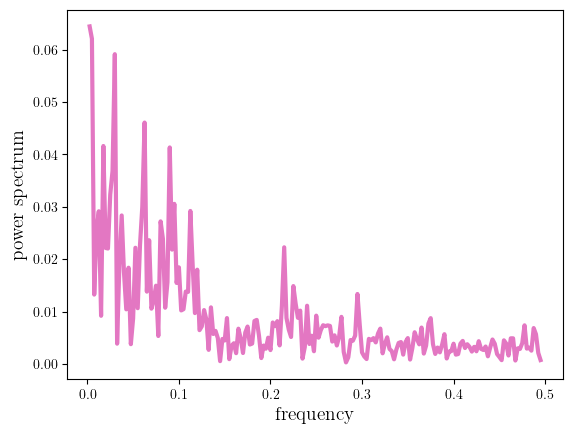

In [27]:
####################################################################################
# Plotting the power spectrum of the network activity (\rho)
# Notice! Here for a correct result, set tmax in the previose code more than 20000 
####################################################################################
from numpy.fft import fft, ifft

L=len(active_node_density)
Fs = 1  #sampling frequency
Y=fft(active_node_density)    
P2 = np.abs(Y/L)
P1 = P2[0:int(L/2)+1]
end=len(P1)-1
P1[1:end] = 2*P1[1:end]
x=np.arange(0,(int(L/2)+1))
f = Fs*x/L
plt.plot(f[1:-2],P1[1:-2], color='C6', lw=3)
plt.xlabel('frequency',fontsize=14, rotation=0)
plt.ylabel('power spectrum',fontsize=14, rotation=90)

Text(0, 0.5, 'number of neuron')

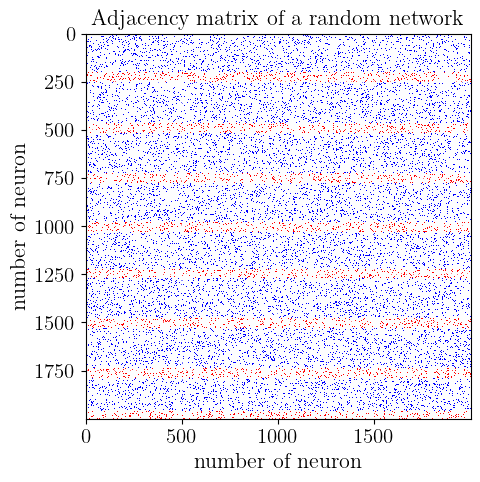

In [78]:
##############################################################################
# The code loads the text file of a random network to plot it as a imageshow.
# The file is reproduced by a C++ code as an output file.
##############################################################################
A=np.loadtxt('MadularAdjMatType0.txt')
plt.figure(figsize = (5, 5))
plt.grid(color = 'w', alpha=.5, linestyle = ':', linewidth = 1.5)
plt.imshow(A, interpolation='nearest', cmap ='bwr_r')
plt.tick_params(axis='both', labelsize=15)
plt.title('Adjacency matrix of a random network', fontsize=16)
plt.xlabel('number of neuron', fontsize=16)
plt.ylabel('number of neuron', fontsize=16)

In [10]:
#loading data for N=2000, Threshold=4

#Seri1 0.1<Np<=1
D41=np.loadtxt('Seri1N2000T4.txt')
D41=np.delete(D41,0,axis=1)

#Seri2 0.01<Np<0.1
D42=np.loadtxt('Seri2N2000T4.txt')
D42=np.delete(D42,0,axis=1)
D42=np.delete(D42,9,axis=0)

#Seri3 0.001<Np<0.01
D43=np.loadtxt('Seri3N2000T4.txt')
D43=np.delete(D43,0,axis=1)

#Seri4 0.0001<Np<0.001
D44=np.loadtxt('Seri4N2000T4.txt')
D44=np.delete(D44,0,axis=1)

#Seri5 0.00001<Np<0.0001
D45=np.loadtxt('Seri5N2000T4.txt')
D45=np.delete(D45,0,axis=1)

#final matrix to send for fft for Threshold=4 (Mat4)
p1=np.concatenate( ( np.delete(D45,0,1),np.delete(D44,0,1) ), axis=0)
p2=np.concatenate( ( p1,np.delete(D43,0,1) ), axis=0)
p3=np.concatenate( ( p2,np.delete(D42,0,1) ), axis=0)
Mat4=np.concatenate( ( p3,np.delete(D41,0,1) ), axis=0)

#final matrix to send for fft for Threshold=4 (Mat4)
p1=np.concatenate( ( np.delete(D45,0,1),np.delete(D44,0,1) ), axis=0)
p2=np.concatenate( ( p1,np.delete(D43,0,1) ), axis=0)
p3=np.concatenate( ( p2,np.delete(D42,0,1) ), axis=0)
Mat4=np.concatenate( ( p3,np.delete(D41,0,1) ), axis=0)

In [5]:
#Power for Mat4

lag=1000
fftMat=[]
for i in np.arange(0,len(Mat4)):
    sig=Mat4[i,:]
    t=np.arange(0,len(sig))
    L=len(t[lag:])
    Fs = 1  #sampling frequency
    Y=fft(sig[lag:])
    P2 = np.abs(Y/L)
    P1 = P2[0:int(L/2)+1]
    end=len(P1)-1
    P1[1:end] = 2*P1[1:end]
    x=np.arange(0,(int(L/2)+1))
    f = Fs*x/L
    fftMat.append(P1)  

fftMat=np.rot90(fftMat)
fftMat=np.flipud(fftMat)

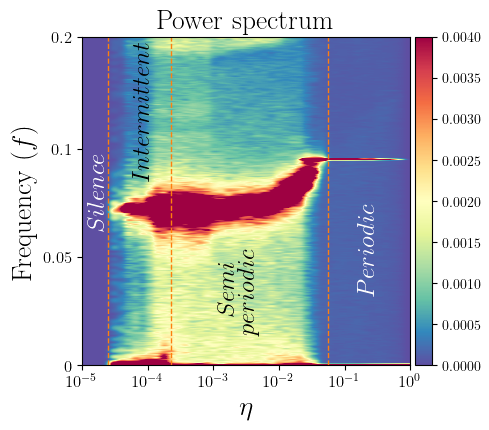

In [74]:
exMat=fftMat[:3800]
colormap='Spectral_r'

fig, axes = plt.subplots(figsize=(5,5))

ax1= plt.subplot()
im=ax1.imshow(exMat, cmap=colormap, vmin=0, vmax=0.004, interpolation = "gaussian", extent=[0,1,0,1], origin='lower')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
#plt.title('Threshold = 4')
plt.ylabel('Frequency~($f$)', fontsize=20)
ax1.set_yticks([0, .33, .66, 1])
ax1.set_yticklabels(['0', '0.05', '0.1', '0.2'])
ax1.set_xticks([0, .2, .4, .6, .8, 1])
ax1.set_xticklabels(['$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^0$'])
plt.xlabel(r'$\eta$', fontsize=20)
plt.plot([0.75,0.75],[0,1], '--', linewidth = 1, color='C1')
plt.plot([0.27,0.27],[0,1], '--', linewidth = 1, color='C1')
plt.plot([0.08,0.08],[0,1], '--', linewidth = 1, color='C1')
plt.title('Power~spectrum',fontsize=20)
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im, cax=cax)
#cbar.set_label('Power~spectrum',fontsize=20, rotation=90)

plt.figtext(0.7, 0.32, '$Periodic$', fontsize=18, fontweight='bold', color='white', rotation=90)
plt.figtext(0.42, 0.28, '$Semi$', fontsize=18, fontweight='bold', color='black', rotation=90)
plt.figtext(0.46, 0.24, '$periodic$', fontsize=18, fontweight='bold', color='black', rotation=90)
plt.figtext(0.25, 0.55, '$Intermittent$', fontsize=18, fontweight='bold', color='black', rotation=90)
plt.figtext(0.16, 0.45, '$Silence$', fontsize=18, fontweight='bold', color='white', rotation=90)

plt.subplots_adjust(top=0.98, bottom=0.02, left=0.15, right=0.85)#, hspace=0.1,wspace=.1)


#plt.savefig('N2000K200T6.pdf')

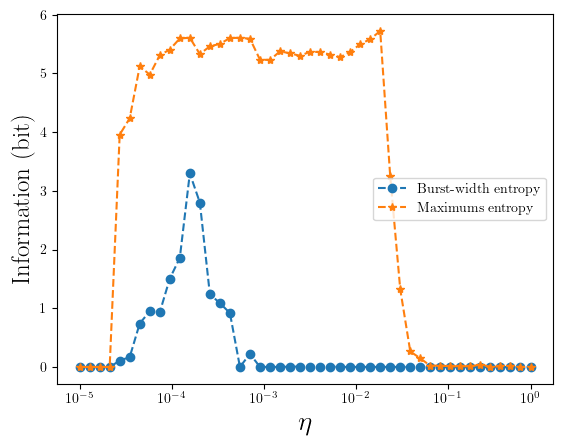

In [21]:
# Calculating Burst-width entropy --> hB
hB=[]
precision=0.005
for i in np.arange(len(Mat4)):
    y=BurstWidth(Mat4[i,:],precision)
    hB.append(BurstShanon(y))

# Calculating maximums entropy --> hM
hM=[]
precision=0.1
for i in np.arange(len(Mat4)):
    hM.append(MaximumShanon(Mat4[i,:],precision)) 

#Plotting
plt.plot(hB, '--o', label='Burst-width entropy')
plt.plot(hM, '--*', label='Maximums entropy')
plt.xlabel(r'$\eta$', fontsize=20)
plt.ylabel('Information (bit)', fontsize=18)
labels=['$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^0$']
plt.xticks([0, 9.2, 18.4, 27.6, 36.8, 45], labels)
plt.legend()

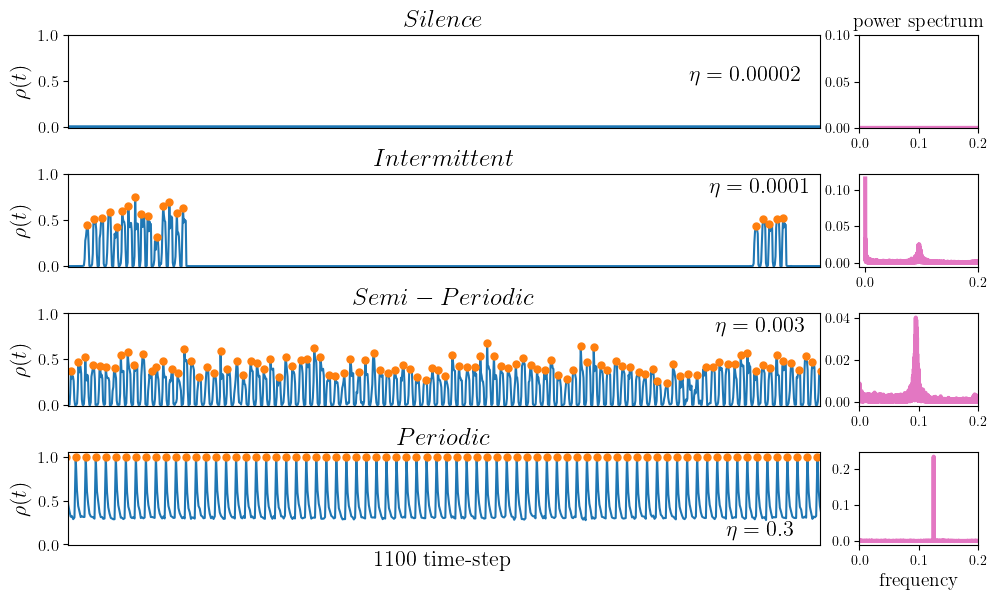

In [31]:


from matplotlib.gridspec import GridSpec
fig=plt.figure(figsize=(10,6),facecolor='white')
gs=GridSpec(4,12)

fs=18
al=0.3
l=1.5
left=15450
right=16550
col='C0'
Bcol='silver'
Scol='whitesmoke'

ax1=fig.add_subplot(gs[0,:10])
ax1.text(.9,.5,r'$\eta = 0.00002$', fontsize=fs-2,horizontalalignment='center',transform=ax1.transAxes)
row=1
sig=Mat4[row,:]
t=np.arange(len(sig))
plt.plot(t,sig,lw=l+1,color=col)
plt.title('$Silence$', fontsize=fs)
plt.ylabel(r'$\rho(t)$', fontsize=fs-2)
plt.ylim(-0.01,1)
plt.xlim(left,right)
plt.xticks(fontsize=fs-6)
plt.yticks(fontsize=fs-6)
plt.gca().set_xticks([])


ax2=fig.add_subplot(gs[0,10:], facecolor='white') 
L=len(sig)
Fs = 1  #sampling frequency
Y=fft(sig)    
P2 = np.abs(Y/L)
P1 = P2[0:int(L/2)+1]
end=len(P1)-1
P1[1:end] = 2*P1[1:end]
x=np.arange(0,(int(L/2)+1))
f = Fs*x/L
plt.plot(f[1:-2],P1[1:-2], color='C6', lw=3)
plt.title('power spectrum',fontsize=14)
plt.xlim([0,0.2])
plt.ylim([0,0.1])


ax3=fig.add_subplot(gs[1,:10])
ax3.text(.92,.8,r'$\eta = 0.0001$', fontsize=fs-2,horizontalalignment='center',transform=ax3.transAxes)
row=9
sig=Mat4[row,:]
t=np.arange(len(sig))
plt.plot(t,sig,lw=l,color=col)
plt.title('$Intermittent$', fontsize=fs)
plt.ylabel(r'$\rho(t)$', fontsize=fs-2)
plt.ylim(-0.01,1)
plt.xlim(left,right)
plt.xticks(fontsize=fs-6)
plt.yticks(fontsize=fs-6)
plt.gca().set_xticks([])
precision=0.08
s,e=StartAndEndPoints(sig,precision)
mp=MaxPoints(sig,s,e)
plt.plot(mp,sig[mp],'o', color='C1',  markersize=5)


ax4=fig.add_subplot(gs[1,10:], facecolor='white') 
L=len(sig)
Fs = 1  #sampling frequency
Y=fft(sig)    
P2 = np.abs(Y/L)
P1 = P2[0:int(L/2)+1]
end=len(P1)-1
P1[1:end] = 2*P1[1:end]
x=np.arange(0,(int(L/2)+1))
f = Fs*x/L
plt.plot(f[1:-2],P1[1:-2], color='C6', lw=3)
plt.xlim([-0.01,0.2])


ax5=fig.add_subplot(gs[2,:10])
ax5.text(.92,.8,r'$\eta = 0.003$', fontsize=fs-2,horizontalalignment='center',transform=ax5.transAxes)
row=20
sig=Mat4[row,:]
t=np.arange(len(sig))
plt.plot(t,sig,lw=l,color=col)
plt.title('$Semi-Periodic$', fontsize=fs)
plt.ylabel(r'$\rho(t)$', fontsize=fs-2)
plt.ylim(-0.01,1)
plt.xlim(left,right)
plt.xticks(fontsize=fs-6)
plt.yticks(fontsize=fs-6)
plt.gca().set_xticks([])
s,e=StartAndEndPoints(sig,precision)
mp=MaxPoints(sig,s,e)
plt.plot(mp,sig[mp],'o', color='C1',  markersize=5)


ax6=fig.add_subplot(gs[2,10:], facecolor='white') 
L=len(sig)
Fs = 1  #sampling frequency
Y=fft(sig)    
P2 = np.abs(Y/L)
P1 = P2[0:int(L/2)+1]
end=len(P1)-1
P1[1:end] = 2*P1[1:end]
x=np.arange(0,(int(L/2)+1))
f = Fs*x/L
plt.plot(f[1:-2],P1[1:-2], color='C6', lw=3)
plt.xlim([0,0.2])


ax7=fig.add_subplot(gs[3,:10])
ax7.text(.92,.1,r'$\eta = 0.3$', fontsize=fs-2,horizontalalignment='center',transform=ax7.transAxes)
row=38
sig=Mat4[row,:]
t=np.arange(len(sig))
plt.plot(t,sig,lw=l,color=col)
plt.title('$Periodic$', fontsize=fs)
plt.ylabel(r'$\rho(t)$', fontsize=fs-2)
plt.ylim(-0.01,1.05)
plt.xlim(11250,11850)
plt.xticks(fontsize=fs-6)
plt.yticks(fontsize=fs-6)
plt.gca().set_xticks([])
window_len=right-left
plt.xlabel(str(window_len)+'~time-step', fontsize=fs-2)
s,e=StartAndEndPoints(sig,precision)
mp=MaxPoints(sig,s,e)
plt.plot(mp,sig[mp],'o', color='C1',  markersize=5)


ax8=fig.add_subplot(gs[3,10:], facecolor='white') 
L=len(sig)
Fs = 1  #sampling frequency
Y=fft(sig)    
P2 = np.abs(Y/L)
P1 = P2[0:int(L/2)+1]
end=len(P1)-1
P1[1:end] = 2*P1[1:end]
x=np.arange(0,(int(L/2)+1))
f = Fs*x/L
plt.plot(f[1:-2],P1[1:-2], color='C6', lw=3)
plt.xlabel('frequency',fontsize=14, rotation=0)
#plt.title('power spectrum',fontsize=14, rotation=90)
plt.xlim([0,0.2])

plt.subplots_adjust(top=0.95, bottom=0.1, left=0.06, right=0.97, hspace=.5, wspace=1)
